# Iris Flower Classification

## Importing Libraries

In [67]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [68]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing Dataset

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data analysis

<Axes: >

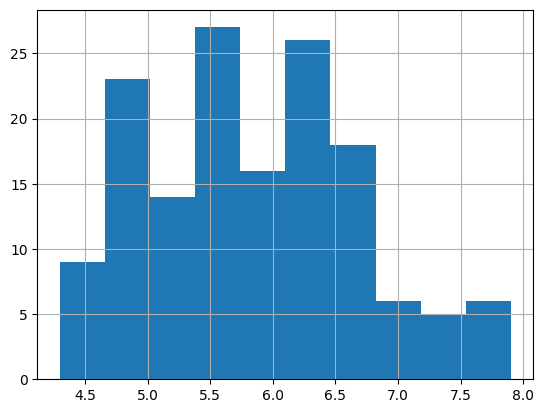

In [69]:
df['SepalLengthCm'].hist()

<Axes: >

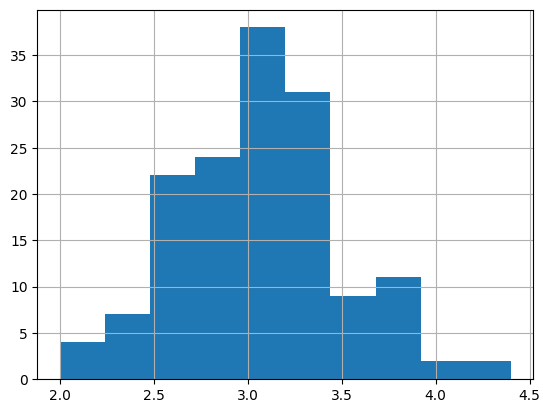

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

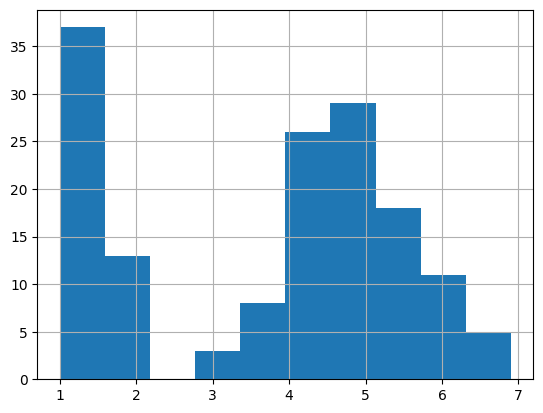

In [12]:
df['PetalLengthCm'].hist()

<Axes: >

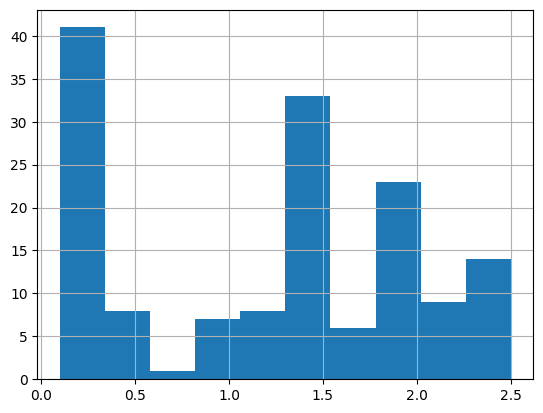

In [13]:
df['PetalWidthCm'].hist()

In [18]:
colors= ['red','orange','blue']
species= ['Iris-virginica','Iris-versicolor','Iris-setosa']

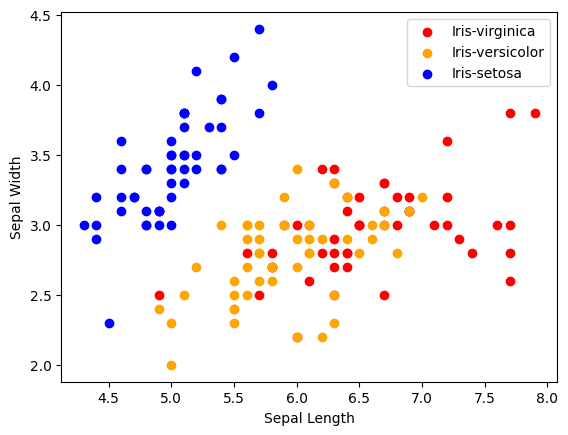

In [19]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

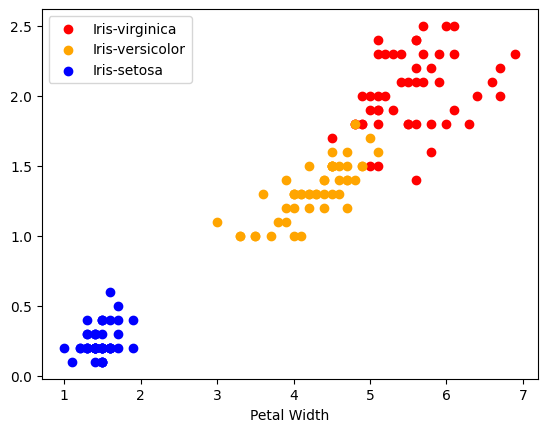

In [20]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.xlabel("Petal Width")
plt.legend()

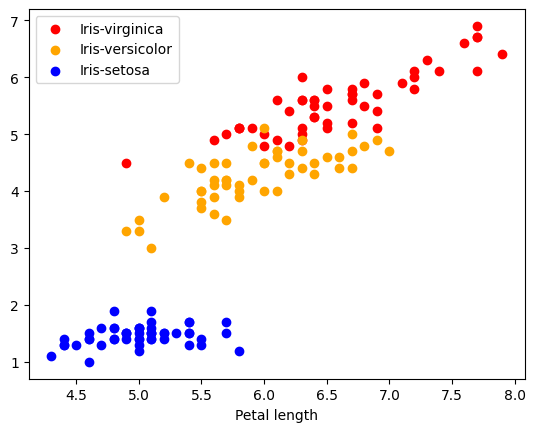

In [22]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'],c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.xlabel("Petal length")
plt.legend()

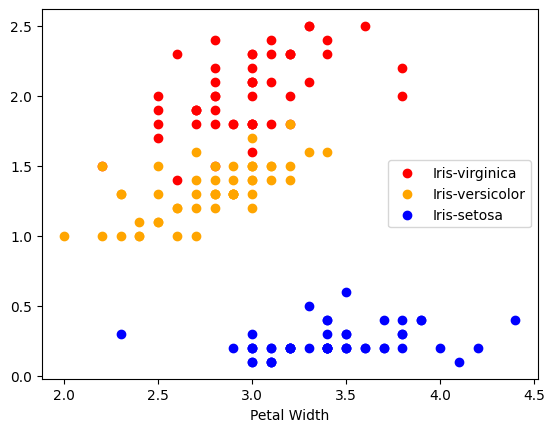

In [57]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.xlabel("Petal Width")
plt.legend()

## Correlation Matrix

In [61]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

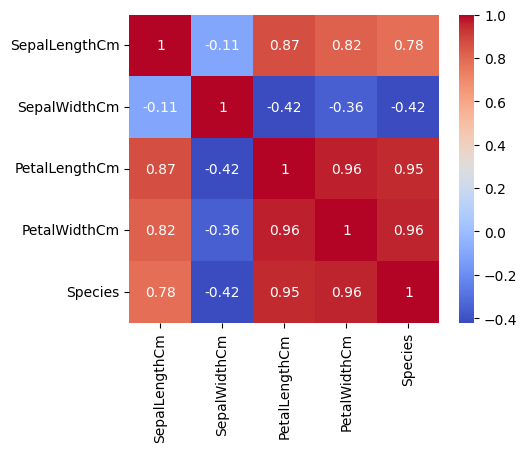

In [64]:
corr= df.corr()
fig, ax= plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap= 'coolwarm')

## Model Training and testing

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.30)

In [31]:
model= LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)*100)

Logistic Regression Accuracy:  97.77777777777777


In [32]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [33]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [37]:
model= KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ",model.score(x_test, y_test)*100)

K-nearest neighbors Accuracy:  100.0


In [38]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [39]:
model= DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test)*100)

Decision Tree Accuracy:  95.55555555555556


In [40]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [41]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [42]:
import pickle
filename='New_Model.sav'
pickle.dump(model, open(filename, 'wb'))

In [44]:
import pickle

In [45]:
filename='New_Model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model save successfully. ")
except Exception as e:
    print(f"Error saving the model: {e}")

Model save successfully. 


In [46]:
load_model=pickle.load(open(filename, 'rb'))

In [47]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [49]:
import sklearn
print(sklearn.__version__)

1.4.1.post1
